In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import norm

Pull out the basket of stocks that we will be used for the

In [ ]:
tickers = ['AAPL','SPY','TLT', 'NVDA', 'JNJ', 'GIS', 'HWM', 'GLD', 'NEE', 'PLD']

start_date = '2022-01-01'
end_date = '2024-01-01'

data = yf.download(tickers, start= start_date, end= end_date)

stock_price = data[['Adj Close']]
pct_returns_forDistr = stock_price['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


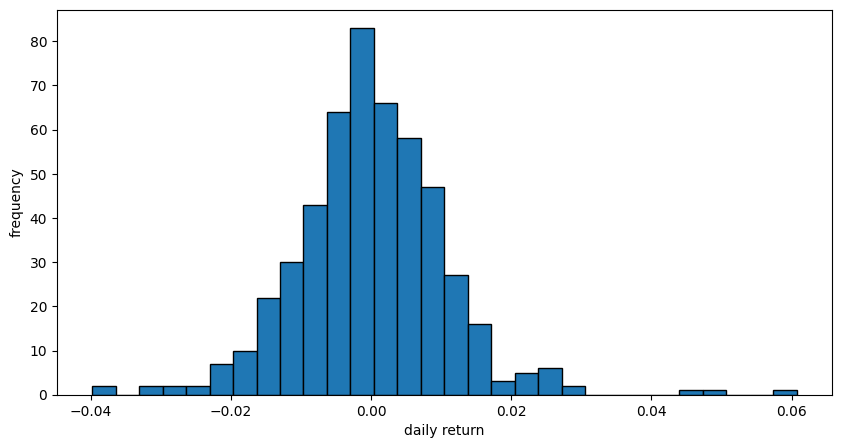

In [ ]:
#sample code for AAPL histogram

bins = 30

#create histogram plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.hist(pct_returns_forDistr['JNJ'], bins=bins, edgecolor='black', label='histogram')
ax.set_xlabel('daily return')
ax.set_ylabel('frequency')

plt.show()

# Q-Q Plot

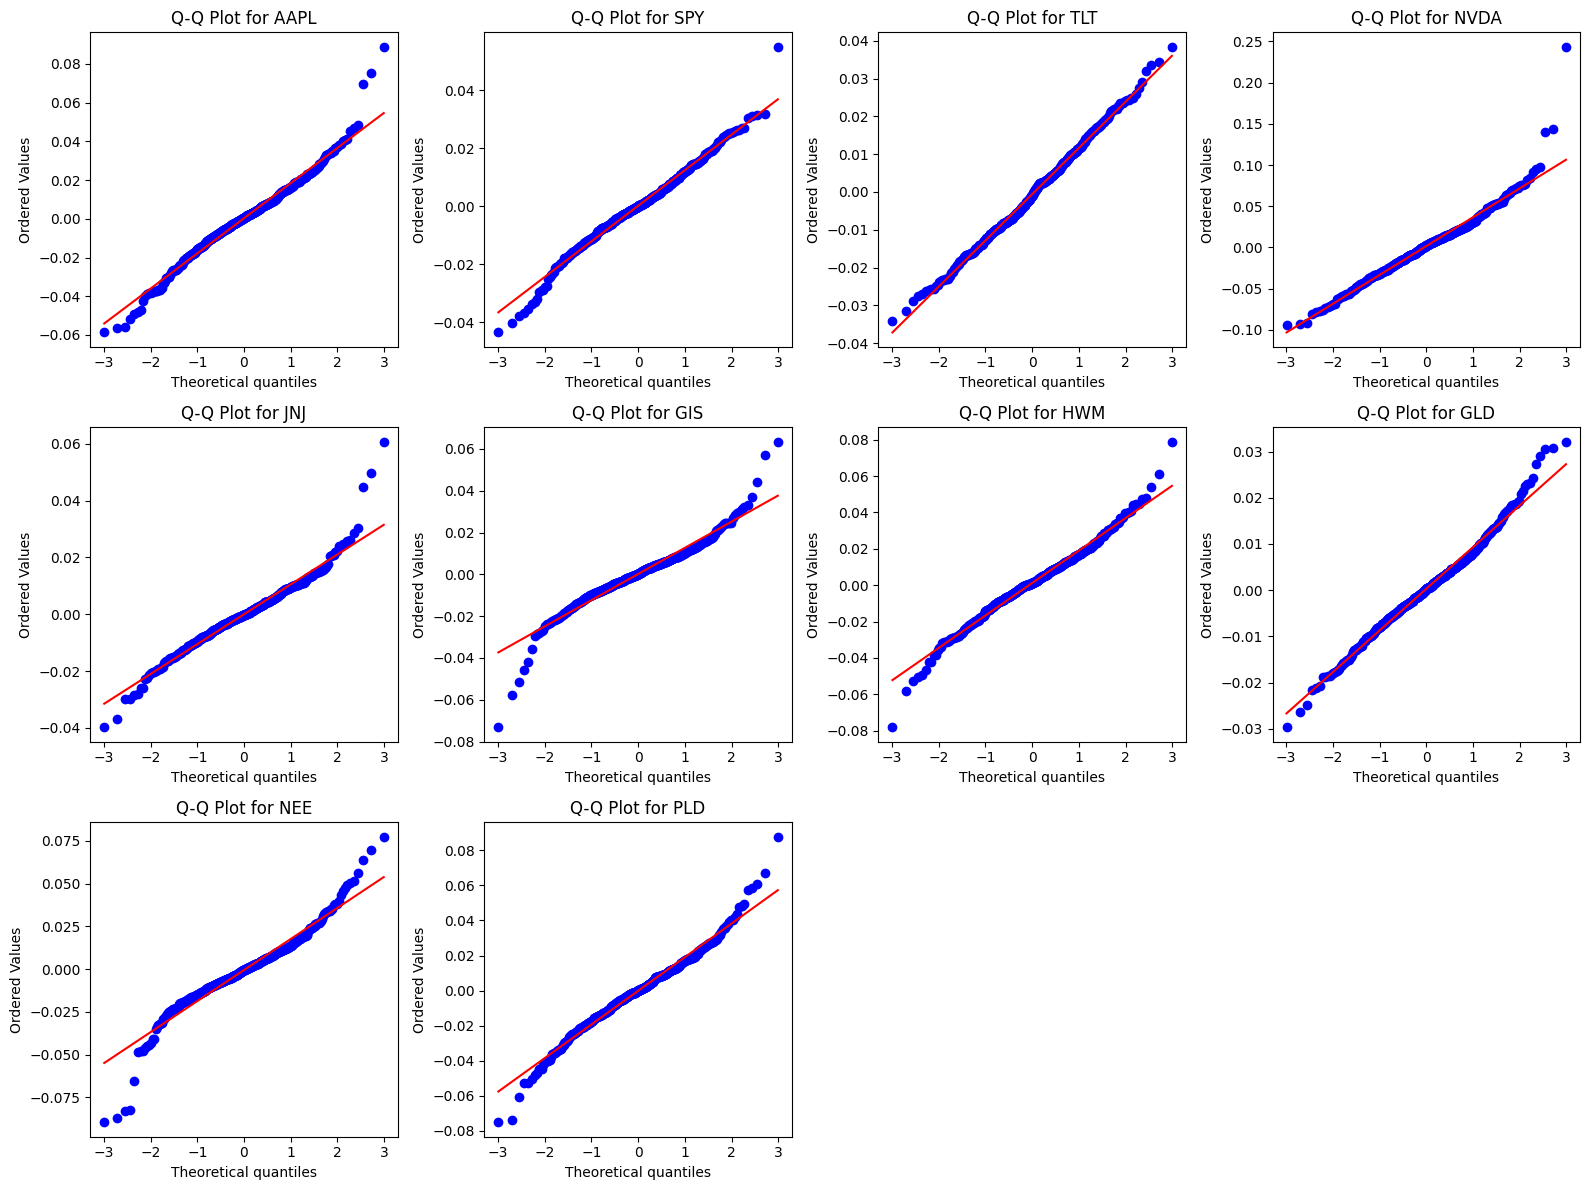

In [ ]:
# Calculate percentage returns
stock_price = data['Adj Close']
pct_returns = stock_price.pct_change().dropna()

# Plotting the Q-Q plots
num_plots = len(tickers)
rows = (num_plots // 4) + (1 if num_plots % 4 != 0 else 0)
cols = 4

plt.figure(figsize=(16, 4 * rows))

for i, ticker in enumerate(tickers):
    plt.subplot(rows, cols, i + 1)
    stats.probplot(pct_returns[ticker], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {ticker}')

plt.tight_layout()
plt.show()

## More Values
We are displaying the kurtosis and skew to show whether there are any outliers.

In [ ]:
#tickers = ['AAPL','SPY','TLT', 'NVDA', 'JNJ', 'GIS', 'HWM', 'GLD', 'NEE', 'PLD']

print(f"TLT Kurtosis: {pct_returns_forDistr['TLT'].kurtosis()}")
print(f"AAPL Kurtosis: {pct_returns_forDistr['AAPL'].kurtosis()}")
print(f"SPY Kurtosis: {pct_returns_forDistr['SPY'].kurtosis()}")
print(f"NVDA Kurtosis: {pct_returns_forDistr['NVDA'].kurtosis()}")
print(f"JNJ Kurtosis: {pct_returns_forDistr['JNJ'].kurtosis()}")
print(f"GIS Kurtosis: {pct_returns_forDistr['GIS'].kurtosis()}")
print(f"HWM Kurtosis: {pct_returns_forDistr['HWM'].kurtosis()}")
print(f"GLD Kurtosis: {pct_returns_forDistr['GLD'].kurtosis()}")
print(f"NEE Kurtosis: {pct_returns_forDistr['NEE'].kurtosis()}")
print(f"PLD Kurtosis: {pct_returns_forDistr['PLD'].kurtosis()}")
print("=========================================================")
print(f"TLT Skew: {pct_returns_forDistr['TLT'].skew()}")
print(f"AAPL Skew: {pct_returns_forDistr['AAPL'].skew()}")
print(f"SPY Skew: {pct_returns_forDistr['SPY'].skew()}")
print(f"NVDA Skew: {pct_returns_forDistr['NVDA'].skew()}")
print(f"JNJ Skew: {pct_returns_forDistr['JNJ'].skew()}")
print(f"GIS Skew: {pct_returns_forDistr['GIS'].skew()}")
print(f"HWM Skew: {pct_returns_forDistr['HWM'].skew()}")
print(f"GLD Skew: {pct_returns_forDistr['GLD'].skew()}")
print(f"NEE Skew: {pct_returns_forDistr['NEE'].skew()}")
print(f"PLD Skew: {pct_returns_forDistr['PLD'].skew()}")

TLT Kurtosis: -0.14083152917588526
AAPL Kurtosis: 2.048758057039205
SPY Kurtosis: 1.277712111033917
NVDA Kurtosis: 4.583616361833194
JNJ Kurtosis: 3.6735097796121754
GIS Kurtosis: 5.0932598471825195
HWM Kurtosis: 1.697553407176351
GLD Kurtosis: 0.9439080907227133
NEE Kurtosis: 4.275519292763475
PLD Kurtosis: 1.9453160664029467
TLT Skew: 0.15749637979004594
AAPL Skew: 0.17274598400418084
SPY Skew: -0.0681320484080057
NVDA Skew: 0.8156475374846384
JNJ Skew: 0.46721234681894996
GIS Skew: -0.27792951756232837
HWM Skew: -0.06669260481853029
GLD Skew: 0.2299708557168052
NEE Skew: -0.34085043275161653
PLD Skew: 0.017775398941334668


## Correlation

In [ ]:
pct_returns.corr()

Ticker,AAPL,GIS,GLD,HWM,JNJ,NEE,NVDA,PLD,SPY,TLT
Ticker,,,,,,,,,,
AAPL,1.000000,0.163227,0.081551,0.551986,0.270478,0.389856,0.663155,0.517354,0.846578,0.080331
GIS,0.163227,1.000000,0.084584,0.139406,0.377960,0.243501,-0.034611,0.215116,0.199822,0.089941
GLD,0.081551,0.084584,1.000000,0.091086,0.014013,0.227671,0.065481,0.150689,0.132802,0.369500
HWM,0.551986,0.139406,0.091086,1.000000,0.206003,0.360617,0.505320,0.471212,0.717192,-0.005025
JNJ,0.270478,0.377960,0.014013,0.206003,1.000000,0.292226,0.064847,0.350924,0.355992,0.062865
NEE,0.389856,0.243501,0.227671,0.360617,0.292226,1.000000,0.243188,0.512932,0.483855,0.230920
NVDA,0.663155,-0.034611,0.065481,0.505320,0.064847,0.243188,1.000000,0.423471,0.749129,0.074442
PLD,0.517354,0.215116,0.150689,0.471212,0.350924,0.512932,0.423471,1.000000,0.680196,0.255683
SPY,0.846578,0.199822,0.132802,0.717192,0.355992,0.483855,0.749129,0.680196,1.000000,0.101686


## Weighting Portfolio
Creates the portfolio with the predefined equal weighting, 10% each.<br>
This will be the starting point for us to improve on the portfolio.


In [ ]:
#start with percent returns series
pct_returns = stock_price.pct_change().dropna()


#define portfolio weights
#this corresponds to order of the columns in the returns df
portfolio_weights = [0.1, 0.15, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1]

# #apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

#add up the 50/50 column returns into single column
portfolio_returns1 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns1.rename(columns={portfolio_returns1.columns[0]:'Portfolio'}, inplace= 'True')
portfolio_returns1

,Portfolio
Date,
2022-01-04,-0.002192
2022-01-05,-0.012591
2022-01-06,-0.005604
2022-01-07,-0.001884
2022-01-10,-0.001814
...,...
2023-12-22,0.001748
2023-12-26,0.004839
2023-12-27,0.004442


In [ ]:
annualized_returns2 = (1+portfolio_returns1).prod() ** (1/2) -1
print(f'{annualized_returns2=}')

volatilities2 = portfolio_returns1.std()
print(f'{volatilities2=}')

rf = 0.0001
Sharpe_ratios2 = (portfolio_returns1.mean() - rf) / portfolio_returns1.std() * np.sqrt(252)
print(f'{Sharpe_ratios2=}')

kurtosis2 = portfolio_returns1.kurtosis()
print(f'{kurtosis2=}')


annualized_returns2=Portfolio    0.049467
dtype: float64
volatilities2=Portfolio    0.010697
dtype: float64
Sharpe_ratios2=Portfolio    0.222902
dtype: float64
kurtosis2=Portfolio    2.053841
dtype: float64


## Monte Carlos Simulation

In [ ]:
import numpy as np
import pandas as pd

num_simulations = 10000
num_assets = len(portfolio_weights)
rf = 0.0001

# Adjusted results array to store weights as well
results = np.zeros((num_assets + 3, num_simulations))

for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(pct_returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(pct_returns.cov() * 252, weights)))

    sharpe_ratio = (portfolio_return - rf) / portfolio_volatility

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio
    results[3:num_assets + 3, i] = weights

columns = ['Returns', 'Volatility', 'Sharpe Ratio'] + [f'Weight_{i}' for i in range(num_assets)]
results_frame = pd.DataFrame(results.T, columns=columns)

# Find the optimal portfolio with the maximum Sharpe ratio
max_sharpe_idx = results_frame['Sharpe Ratio'].idxmax()
optimal_portfolio = results_frame.loc[max_sharpe_idx]

print(f"Optimal Portfolio Weights: \n{optimal_portfolio[columns[3:]]}")
print(f"Annualized Return: {optimal_portfolio['Returns']}")
print(f"Volatility: {optimal_portfolio['Volatility']}")
print(f"Maximum Sharpe Ratio: {optimal_portfolio['Sharpe Ratio']}")


Optimal Portfolio Weights: 
Weight_0    0.021067
Weight_1    0.169858
Weight_2    0.241286
Weight_3    0.251318
Weight_4    0.031233
Weight_5    0.007204
Weight_6    0.177509
Weight_7    0.015999
Weight_8    0.054338
Weight_9    0.030188
Name: 3964, dtype: float64
Annualized Return: 0.17003802232781953
Volatility: 0.182238157231873
Maximum Sharpe Ratio: 0.932505161976571


In [ ]:
import numpy as np
import pandas as pd

num_simulations = 100000
num_assets = len(portfolio_weights)
rf = 0.0001

target_annualized_return = 0.10
target_sharpe_ratio = 1.5
target_kurtosis = 2.076495

results = []

for i in range(num_simulations):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    portfolio_return = np.sum(pct_returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(pct_returns.cov() * 252, weights)))
    wt_portfolio_ret = pct_returns.dot(weights)
    portfolio_returns1 = pd.DataFrame(wt_portfolio_ret, columns=['Portfolio'])

    sharpe_ratio = (portfolio_return - rf) / portfolio_volatility
    kurtosis = portfolio_returns1.kurtosis()[0]

    # Store the results if they meet the constraints
    if portfolio_return >= target_annualized_return and sharpe_ratio > target_sharpe_ratio and kurtosis >= target_kurtosis:
        results.append({
            'Returns': portfolio_return,
            'Volatility': portfolio_volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Kurtosis': kurtosis,
            'Weights': weights
        })

results_frame = pd.DataFrame(results)

# Find the optimal portfolio with the maximum Sharpe ratio
if not results_frame.empty:
    max_sharpe_idx = results_frame['Sharpe Ratio'].idxmax()
    optimal_portfolio = results_frame.loc[max_sharpe_idx]

    print(f"Optimal Portfolio Weights: {optimal_portfolio['Weights']}")
    print(f"Annualized Return: {optimal_portfolio['Returns']}")
    print(f"Volatility: {optimal_portfolio['Volatility']}")
    print(f"Maximum Sharpe Ratio: {optimal_portfolio['Sharpe Ratio']}")
    print(f"Kurtosis: {optimal_portfolio['Kurtosis']}")
else:
    print("No portfolios met the constraints.")


<ipython-input-20-0303491f9622>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kurtosis = portfolio_returns1.kurtosis()[0]


No portfolios met the constraints.
